In [3]:
import struct
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

dpi=100

In [4]:
filename = input("Enter the data file name (ext = .dat): ")+".dat";
print()

In [5]:
def header(file):
    struct.unpack('i',file.read(4))
    
def unpack_float(file, dims=(1)):
    if dims==(1):
        return struct.unpack('d',file.read(8))[0]
    else:
        dtype = np.dtype(np.float64)
        dtype = dtype.newbyteorder('<')
        return np.frombuffer(file.read(8*np.product(dims))).reshape(dims)

def unpack_int(file):
    return struct.unpack('i',file.read(4))[0]

class channel():
    pass
    
with open(filename, mode="rb") as file:
    header(file)
    channel.nout = unpack_int(file)
    channel.tend = unpack_float(file)
    header(file)
    header(file)
    channel.mx = unpack_int(file)
    channel.my = unpack_int(file)
    channel.meqn = unpack_int(file)
    channel.mbc = unpack_int(file)
    header(file)
    header(file)
    channel.dt = unpack_float(file)
    channel.dx = unpack_float(file)
    channel.dy = unpack_float(file)
    gamma = unpack_float(file)
    channel.cf = unpack_float(file)
    channel.cb = unpack_float(file)
    header(file)
    header(file)
    channel.ixbc = unpack_int(file)
    channel.iybc = unpack_int(file)
    header(file)
    header(file)
    channel.x = unpack_float(file, dims=(channel.mx,1))
    header(file)
    header(file)
    channel.y = unpack_float(file, dims=(channel.my,1))
    header(file)
    header(file)
    channel.b = unpack_float(file, dims=(channel.my,channel.mx))
    header(file)
    header(file)
    channel.cbxy = unpack_float(file, dims=(channel.my,channel.mx))
    header(file)
    
    channel.t = np.zeros((channel.nout))
    channel.h = np.zeros((channel.nout, channel.my, channel.mx))
    channel.qu = np.zeros((channel.nout, channel.my, channel.mx))
    channel.qv = np.zeros((channel.nout, channel.my, channel.mx))
    
    for i in range(channel.nout):
        header(file)
        channel.t[i] = unpack_float(file)
        header(file)
        header(file)
        channel.h[i,:,:] = unpack_float(file, dims=(channel.my,channel.mx))
        header(file)
        header(file)
        channel.qu[i,:,:] = unpack_float(file, dims=(channel.my,channel.mx))
        header(file)
        header(file)
        channel.qv[i,:,:] = unpack_float(file, dims=(channel.my,channel.mx))
        header(file)
    
    channel.x = channel.x[:,0][np.newaxis,:]
    channel.y = channel.y[:,0][:,np.newaxis]
    
    channel.u = channel.qu/channel.h
    channel.v = channel.qv/channel.h
    channel.u[channel.h < 0.001] = 0.
    channel.v[channel.h < 0.001] = 0.
    channel.qu[channel.h < 0.001] = 0.
    channel.qv[channel.h < 0.001] = 0.
    channel.h[channel.h < 0.001] = 0.
    channel.eta = channel.h + channel.b
    

KeyboardInterrupt: 

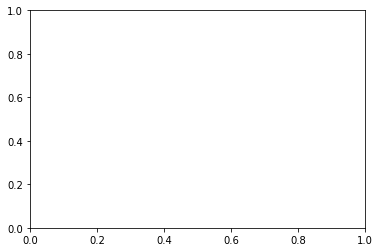

In [6]:
for i in range(channel.nout):
    plt.figure(1)
    plt.clf()
    q = plt.pcolor(channel.x,channel.y,channel.h[i,:,:])
    plt.contour(channel.x.squeeze(),channel.y.squeeze(),channel.b,3,colors="w")
    plt.colorbar(q)
    q.set_clim([0,0.4])
    plt.savefig("figures/"+str(i).zfill(4)+'.png',dpi=dpi,bbox_inches="tight")